<a href="https://colab.research.google.com/github/FerCipriani/Primeros/blob/main/iris_05_10_modelos_con_optimizacion_y_normalizacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 * Arbol'
 * Ranfom Forest'
 * KNN Vecinos'
 * Naive Bayes'
 * Boosting and AdaBoost'
 * LDA Linear Discriminant
 * MLPClassifier
 * Support Vector Machine'
 * Keras

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DataSets/iris.csv")
data.head(2) # Miramos las primeras filas

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


In [4]:
data.columns.values

array(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width',
       'Species'], dtype=object)

In [5]:
import seaborn as sns

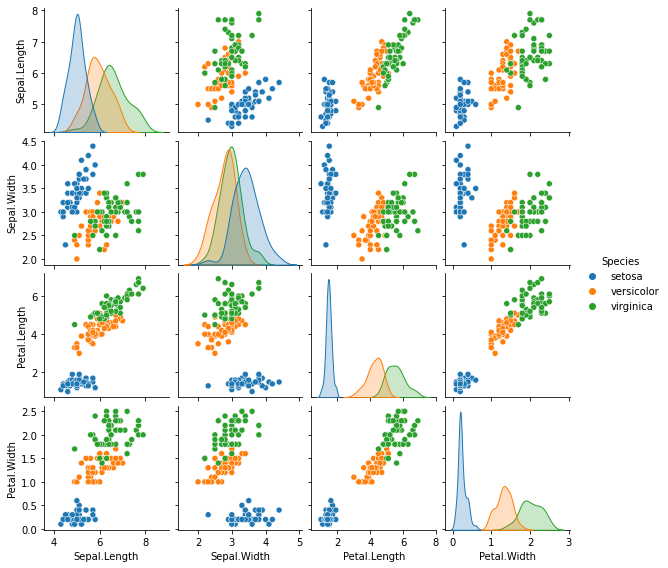

In [6]:
sns.pairplot(data, hue='Species', height=2) #Plot de a pares

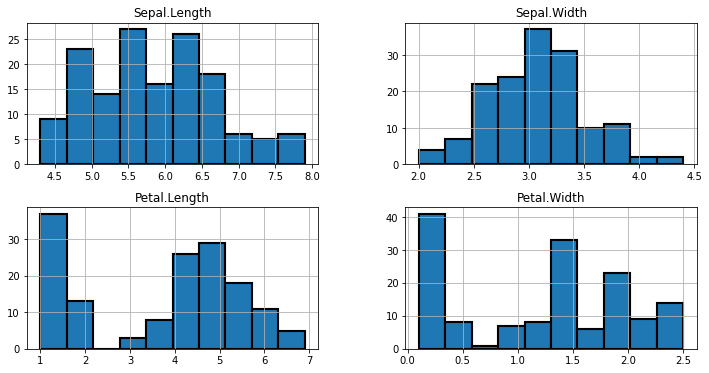

In [27]:
import matplotlib.pyplot as plt
data.hist(edgecolor='black', linewidth=2.1)
fig=plt.gcf()
fig.set_size_inches(12,6)

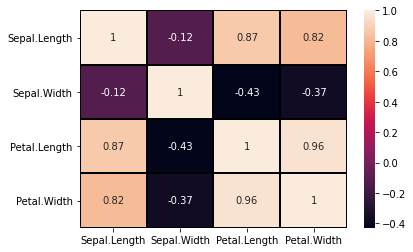

In [ ]:
sns.heatmap(data.corr(method='pearson'), annot=True, linecolor = 'black', linewidths = 1)
plt.show()

Modelos

In [7]:
#librerias
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [8]:
from sklearn.model_selection import GridSearchCV

In [9]:
Data=data.drop(['Species'], axis=1) # Data son las etiquetas
Target=data.drop(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width'], axis=1) #Target son las variables

In [10]:
from sklearn.preprocessing import StandardScaler 

In [20]:
Scl = StandardScaler ()
DataST = Scl.fit_transform(Data)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(DataST, Target, test_size=.25, random_state = 0) 

In [22]:
y_test.value_counts('Species')

Species
versicolor    16
setosa        13
virginica      9
dtype: int64

# 01 Arbol

In [23]:
from sklearn.tree import DecisionTreeClassifier

In [24]:
ModelTree = DecisionTreeClassifier(criterion='entropy', 
                                      splitter='best',
                                      max_depth=None,
                                      min_samples_split=2, 
                                      min_samples_leaf=1, 
                                      min_weight_fraction_leaf=0.0, 
                                      max_features=None, 
                                      random_state=None, 
                                      max_leaf_nodes=None, 
                                      min_impurity_decrease=0.0, 
                                      min_impurity_split=None, 
                                      class_weight=None, 
                                      ccp_alpha=0.0,
                                      ).fit(X_train, y_train)

In [28]:
Imp=ModelTree.feature_importances_
print(Data.columns)
print(Imp) # Parece que Sepal.Length es nulo. Una vez que termine todo rehacemos sin esta variable

Index(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width'], dtype='object')
[0.01832976 0.01832976 0.31848916 0.64485132]


    Modelado: 100.000


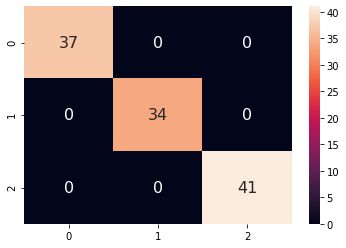

    Test    : 97.368


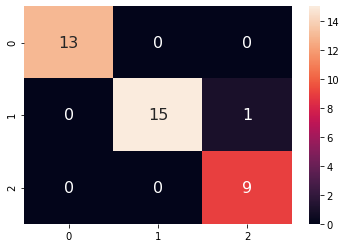

In [29]:
print("    Modelado:", "{0:.3f}".format(100*accuracy_score(ModelTree.predict(X_train),y_train)))
sns.heatmap(confusion_matrix(y_train, ModelTree.predict(X_train)), annot=True, annot_kws={"size": 16})
plt.show()

print("    Test    :", "{0:.3f}".format(100*accuracy_score(ModelTree.predict(X_test),y_test)))
sns.heatmap(confusion_matrix(y_test, ModelTree.predict(X_test)), annot=True, annot_kws={"size": 16})
plt.show()

In [30]:
print(classification_report(y_test, ModelTree.predict(X_test)))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.94      0.97        16
   virginica       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



In [31]:
param = {'criterion':['gini','entropy'], 
         #'max_features': ['auto', 'sqrt', 'log2'],
         'ccp_alpha': [0.1, .01, .001, 0], 
         #'max_depth' : [5, 6, 7, 8, 9 ,10 ,11 ,12 ,15 ,20 ,30 ,40 ,50 ,70 ,90 ,120 ,150],
         'min_samples_leaf':np.arange(2,10)}
        

In [32]:
ModelTree1 = GridSearchCV(DecisionTreeClassifier(), param).fit(X_train, y_train)
print(ModelTree1.best_estimator_)

DecisionTreeClassifier(ccp_alpha=0.01, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


    Modelado: 98.214


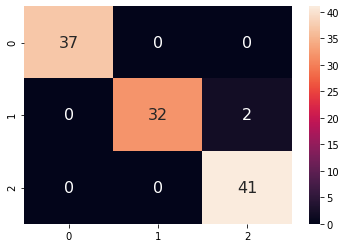

    Test    : 97.368


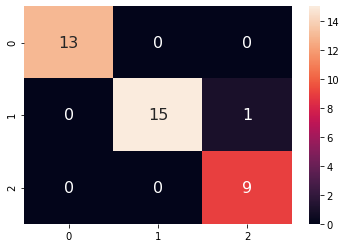

In [33]:
print("    Modelado:", "{0:.3f}".format(100*accuracy_score(ModelTree1.predict(X_train),y_train)))
sns.heatmap(confusion_matrix(y_train, ModelTree1.predict(X_train)), annot=True, annot_kws={"size": 16})
plt.show()

print("    Test    :", "{0:.3f}".format(100*accuracy_score(ModelTree1.predict(X_test),y_test)))
sns.heatmap(confusion_matrix(y_test, ModelTree1.predict(X_test)), annot=True, annot_kws={"size": 16})
plt.show()

In [34]:
print(classification_report(y_test, ModelTree1.predict(X_test)))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.94      0.97        16
   virginica       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



In [35]:
import graphviz 
from sklearn import tree

In [37]:
ModelTree1=DecisionTreeClassifier(ccp_alpha=0.001, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best').fit(X_train, y_train)

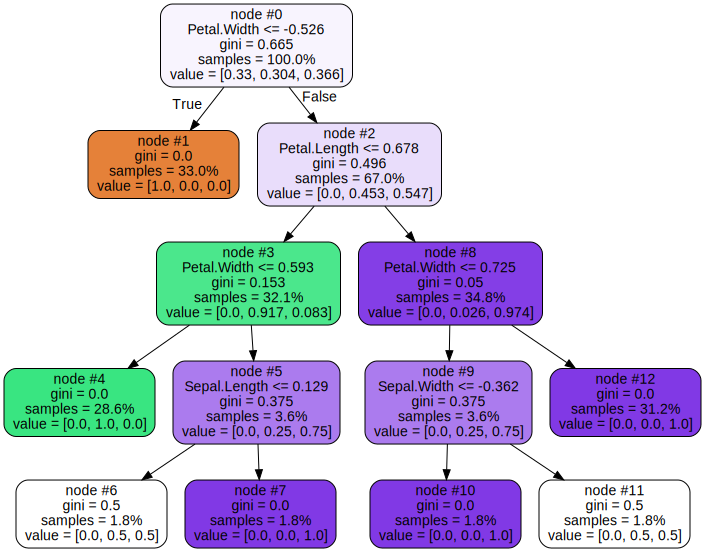

In [38]:
dot_data = tree.export_graphviz( ModelTree1, 
                                out_file=None,  
                                feature_names=['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width'],  
                                filled=True,  
                                node_ids=True, 
                                proportion=True, 
                                rounded=True,) 
graph = graphviz.Source(dot_data) 
graph

 # 02 Random Forest

In [39]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
RFm = RandomForestClassifier(n_estimators=500, class_weight="balanced",
                               max_features = 'sqrt', verbose=0, max_depth=6,
                               oob_score=True, random_state=50).fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


    Modelado: 100.000


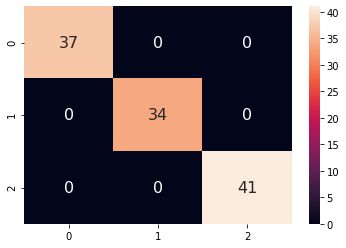

    Test    : 97.368


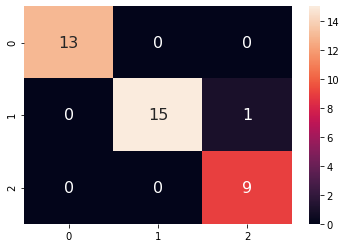

In [41]:
print("    Modelado:", "{0:.3f}".format(100*accuracy_score(RFm.predict(X_train),y_train)))
sns.heatmap(confusion_matrix(y_train, RFm.predict(X_train)), annot=True, annot_kws={"size": 16})
plt.show()

print("    Test    :", "{0:.3f}".format(100*accuracy_score(RFm.predict(X_test),y_test)))
sns.heatmap(confusion_matrix(y_test, RFm.predict(X_test)), annot=True, annot_kws={"size": 16})
plt.show()

In [42]:
print(classification_report(y_test, RFm.predict(X_test)))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.94      0.97        16
   virginica       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



In [43]:
param_RFm = {'bootstrap': [True, False],
 'max_depth': [15, 20, 25],
 'max_features': ['sqrt'],
 'min_samples_leaf': [1, 2, 4, 6, 8],
 'min_samples_split': [2, 5, 10, 15],
 'n_estimators': [500]} #, 200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]} #Pongo esto en 500 por una cuestion de tiempo

In [ ]:
RFm1 = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_RFm, cv= 5).fit(X_train, y_train)

In [45]:
RFm1.best_params_

{'bootstrap': False,
 'max_depth': 15,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 15,
 'n_estimators': 500}

In [48]:
RFm1=RandomForestClassifier(max_depth= 15, 
                            bootstrap=False,
                            class_weight="balanced",
                            max_features= 'sqrt',
                            min_samples_leaf= 2, 
                            min_samples_split= 15, 
                            n_estimators= 500).fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


    Modelado: 97.321


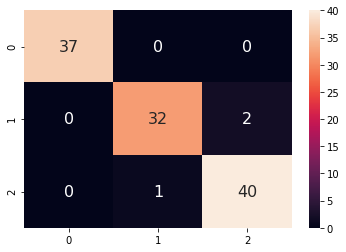

    Test    : 97.368


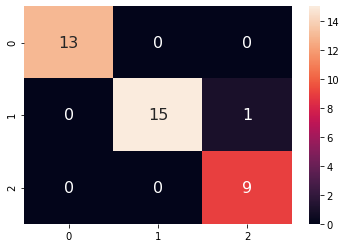

In [49]:
print("    Modelado:", "{0:.3f}".format(100*accuracy_score(RFm1.predict(X_train),y_train)))
sns.heatmap(confusion_matrix(y_train, RFm1.predict(X_train)), annot=True, annot_kws={"size": 16})
plt.show()

print("    Test    :", "{0:.3f}".format(100*accuracy_score(RFm1.predict(X_test),y_test)))
sns.heatmap(confusion_matrix(y_test, RFm1.predict(X_test)), annot=True, annot_kws={"size": 16})
plt.show()

In [50]:
print(classification_report(y_test, RFm1.predict(X_test)))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.94      0.97        16
   virginica       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



 # 03 KNN Vecinos

In [51]:
from sklearn.neighbors import KNeighborsClassifier

In [52]:
knn = KNeighborsClassifier(n_neighbors = 3).fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


    Modelado: 97.321


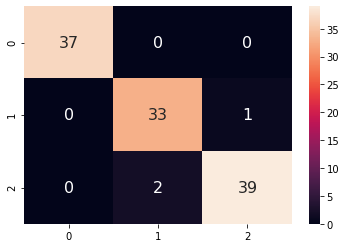

    Test    : 97.368


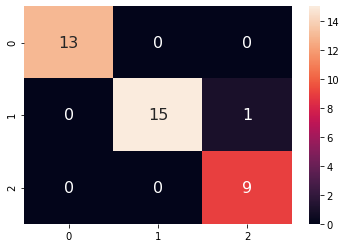

In [53]:
print("    Modelado:", "{0:.3f}".format(100*accuracy_score(knn.predict(X_train),y_train)))
sns.heatmap(confusion_matrix(y_train, knn.predict(X_train)), annot=True, annot_kws={"size": 16})
plt.show()

print("    Test    :", "{0:.3f}".format(100*accuracy_score(knn.predict(X_test),y_test)))
sns.heatmap(confusion_matrix(y_test, knn.predict(X_test)), annot=True, annot_kws={"size": 16})
plt.show()

In [54]:
print(classification_report(y_test, knn.predict(X_test)))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.94      0.97        16
   virginica       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



In [55]:
param_Knn = {
'n_neighbors': [2, 3, 5, 11, 19],
'weights': ['uniform', 'distance'],
'metric': ['euclidean', 'manhattan'],
}

In [56]:
cmK1 = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=param_Knn, cv= 5).fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

In [57]:
cmK1.best_params_

{'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}

In [ ]:
#knn1 = KNeighborsClassifier(n_neighbors = 2, metric= 'euclidean', weights= 'distance').fit(X_train, y_train)

    Modelado: 100.000


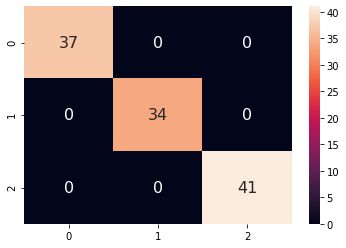

    Test    : 97.368


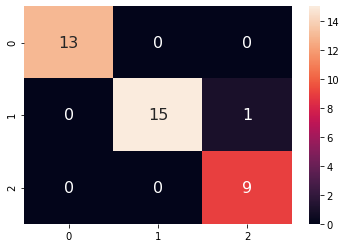

In [58]:
print("    Modelado:", "{0:.3f}".format(100*accuracy_score(cmK1.predict(X_train),y_train)))
sns.heatmap(confusion_matrix(y_train, cmK1.predict(X_train)), annot=True, annot_kws={"size": 16})
plt.show()

print("    Test    :", "{0:.3f}".format(100*accuracy_score(cmK1.predict(X_test),y_test)))
sns.heatmap(confusion_matrix(y_test, cmK1.predict(X_test)), annot=True, annot_kws={"size": 16})
plt.show()

In [59]:
print(classification_report(y_test, cmK1.predict(X_test)))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.94      0.97        16
   virginica       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



 # 04 Naive Bayes classifier

In [60]:
from sklearn.naive_bayes import GaussianNB

In [61]:
gnb = GaussianNB().fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


    Modelado: 94.643


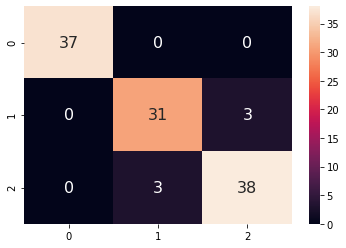

    Test    : 100.000


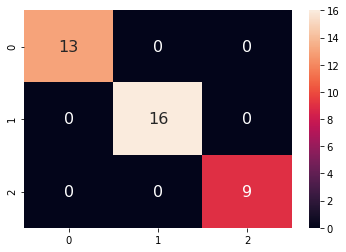

In [62]:
print("    Modelado:", "{0:.3f}".format(100*accuracy_score(gnb.predict(X_train),y_train)))
sns.heatmap(confusion_matrix(y_train, gnb.predict(X_train)), annot=True, annot_kws={"size": 16})
plt.show()

print("    Test    :", "{0:.3f}".format(100*accuracy_score(gnb.predict(X_test),y_test)))
sns.heatmap(confusion_matrix(y_test, gnb.predict(X_test)), annot=True, annot_kws={"size": 16})
plt.show()

In [63]:
print(classification_report(y_test, gnb.predict(X_test)))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      1.00      1.00        16
   virginica       1.00      1.00      1.00         9

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



In [64]:
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

In [65]:
gnb1 = GridSearchCV(estimator=GaussianNB(), 
                 param_grid=params_NB, 
                 verbose=0, 
                 scoring='accuracy',).fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = col

In [66]:
gnb1.best_params_

{'var_smoothing': 0.008111308307896872}

    Modelado: 94.643


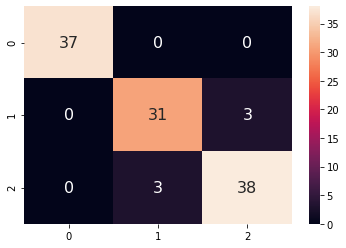

    Test    : 97.368


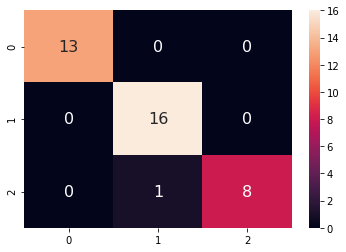

In [67]:
print("    Modelado:", "{0:.3f}".format(100*accuracy_score(gnb1.predict(X_train),y_train)))
sns.heatmap(confusion_matrix(y_train, gnb1.predict(X_train)), annot=True, annot_kws={"size": 16})
plt.show()

print("    Test    :", "{0:.3f}".format(100*accuracy_score(gnb1.predict(X_test),y_test)))
sns.heatmap(confusion_matrix(y_test, gnb1.predict(X_test)), annot=True, annot_kws={"size": 16})
plt.show()

In [68]:
print(classification_report(y_test, gnb.predict(X_test)))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      1.00      1.00        16
   virginica       1.00      1.00      1.00         9

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



 # 05 Boosting and AdaBoost

In [69]:
from sklearn.ensemble import AdaBoostClassifier

In [70]:
clf = AdaBoostClassifier(n_estimators=100, random_state=0).fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


    Modelado: 93.750


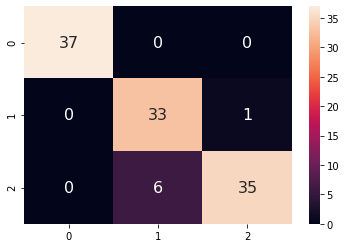

    Test    : 89.474


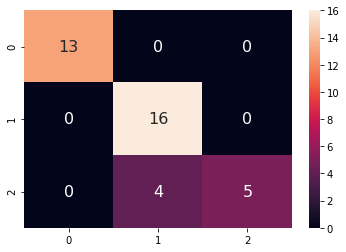

In [71]:
print("    Modelado:", "{0:.3f}".format(100*accuracy_score(clf.predict(X_train),y_train)))
sns.heatmap(confusion_matrix(y_train, clf.predict(X_train)), annot=True, annot_kws={"size": 16})
plt.show()

print("    Test    :", "{0:.3f}".format(100*accuracy_score(clf.predict(X_test),y_test)))
sns.heatmap(confusion_matrix(y_test, clf.predict(X_test)), annot=True, annot_kws={"size": 16})
plt.show()

In [72]:
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       0.80      1.00      0.89        16
   virginica       1.00      0.56      0.71         9

    accuracy                           0.89        38
   macro avg       0.93      0.85      0.87        38
weighted avg       0.92      0.89      0.89        38



In [73]:
param_abc = AdaBoostClassifier(base_estimator=DecisionTreeClassifier())

parameters = {'base_estimator__max_depth':[i for i in range(2,11,2)],
              'base_estimator__min_samples_leaf':[5,10],
              'n_estimators':[10,50,250,1000],
              'learning_rate':[0.01,0.1]}

In [74]:
clf1 = GridSearchCV(AdaBoostClassifier(base_estimator=DecisionTreeClassifier()), parameters, verbose=0,).fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

    Modelado: 100.000


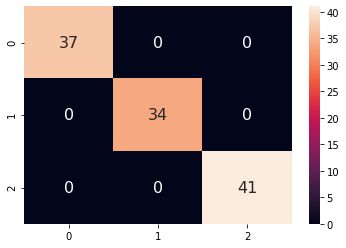

    Test    : 97.368


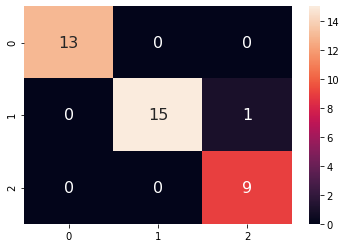

In [75]:
print("    Modelado:", "{0:.3f}".format(100*accuracy_score(clf1.predict(X_train),y_train)))
sns.heatmap(confusion_matrix(y_train, clf1.predict(X_train)), annot=True, annot_kws={"size": 16})
plt.show()

print("    Test    :", "{0:.3f}".format(100*accuracy_score(clf1.predict(X_test),y_test)))
sns.heatmap(confusion_matrix(y_test, clf1.predict(X_test)), annot=True, annot_kws={"size": 16})
plt.show()

In [76]:
print(classification_report(y_test, clf1.predict(X_test)))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.94      0.97        16
   virginica       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



 # 06 LDA Linear Discriminant Analysis
 https://es.wikipedia.org/wiki/An%C3%A1lisis_discriminante_lineal

In [77]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [78]:
lda = LinearDiscriminantAnalysis(n_components = 3).fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(4, 3 - 1) = 2 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:469: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)


    Modelado: 98.214


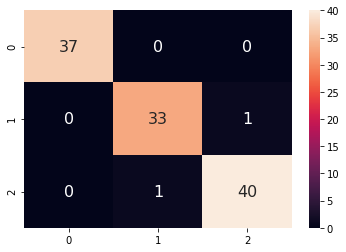

    Test    : 97.368


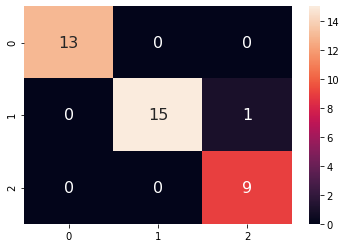

In [79]:
print("    Modelado:", "{0:.3f}".format(100*accuracy_score(lda.predict(X_train),y_train)))
sns.heatmap(confusion_matrix(y_train, lda.predict(X_train)), annot=True, annot_kws={"size": 16})
plt.show()

print("    Test    :", "{0:.3f}".format(100*accuracy_score(lda.predict(X_test),y_test)))
sns.heatmap(confusion_matrix(y_test, lda.predict(X_test)), annot=True, annot_kws={"size": 16})
plt.show()

In [80]:
print(classification_report(y_test, lda.predict(X_test)))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.94      0.97        16
   virginica       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



 # 07 MLPClassifier

In [81]:
from sklearn.neural_network import MLPClassifier

In [82]:
Mlpc = MLPClassifier(random_state=1, 
                    hidden_layer_sizes=(150,100,50), 
                    max_iter=300,activation = 'relu', 
                    solver='adam').fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


    Modelado: 100.000


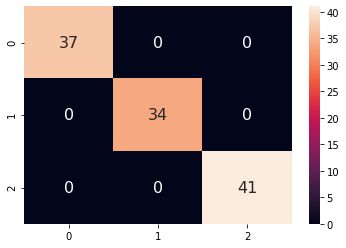

    Test    : 97.368


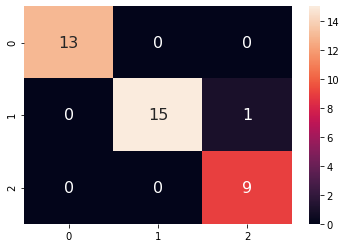

In [83]:
print("    Modelado:", "{0:.3f}".format(100*accuracy_score(Mlpc.predict(X_train),y_train)))
sns.heatmap(confusion_matrix(y_train, Mlpc.predict(X_train)), annot=True, annot_kws={"size": 16})
plt.show()

print("    Test    :", "{0:.3f}".format(100*accuracy_score(Mlpc.predict(X_test),y_test)))
sns.heatmap(confusion_matrix(y_test, Mlpc.predict(X_test)), annot=True, annot_kws={"size": 16})
plt.show()

In [84]:
print(classification_report(y_test, Mlpc.predict(X_test)))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.94      0.97        16
   virginica       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



In [85]:
GridMlpc1={'activation': ['tanh', 'relu'],
 'alpha': [0.001, 0.05],
 'hidden_layer_sizes': (150, 100, 50),
 'learning_rate': ['constant', 'adaptive'],
 'solver': ['sgd', 'adam']}

In [86]:
Mlpc1 = GridSearchCV(MLPClassifier(), GridMlpc1, n_jobs=-1, cv=3).fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [87]:
Mlpc1.best_estimator_

MLPClassifier(activation='relu', alpha=0.001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=150, learning_rate='adaptive',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

    Modelado: 98.214


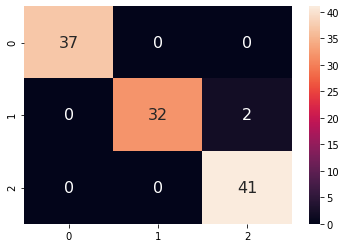

    Test    : 97.368


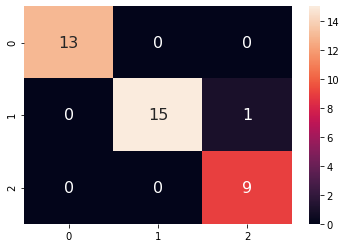

In [88]:
print("    Modelado:", "{0:.3f}".format(100*accuracy_score(Mlpc1.predict(X_train),y_train)))
sns.heatmap(confusion_matrix(y_train, Mlpc1.predict(X_train)), annot=True, annot_kws={"size": 16})
plt.show()

print("    Test    :", "{0:.3f}".format(100*accuracy_score(Mlpc1.predict(X_test),y_test)))
sns.heatmap(confusion_matrix(y_test, Mlpc1.predict(X_test)), annot=True, annot_kws={"size": 16})
plt.show()

In [89]:
print(classification_report(y_test, Mlpc1.predict(X_test)))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.94      0.97        16
   virginica       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



In [ ]:
Mlpc1.best_score_

0.981981981981982

# 08 Support Vector Machine

In [90]:
from sklearn.svm import SVC

In [91]:
X = data.iloc[:,0:4].values
y = data.iloc[:,4].values

In [94]:
Scl = StandardScaler ()
XST = Scl.fit_transform(X)

In [109]:
X_train, X_test, y_train, y_test = train_test_split(XST, y, test_size=.25, random_state = 0)

In [110]:
mSVC = SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=1, gamma=10, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=True).fit(X_train, y_train)

[LibSVM]

    Train score of trained model: 100.000


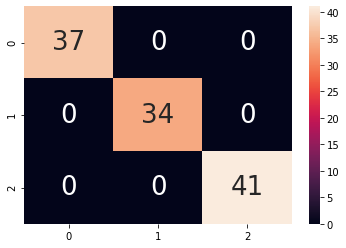

    Test score of trained model:  78.947


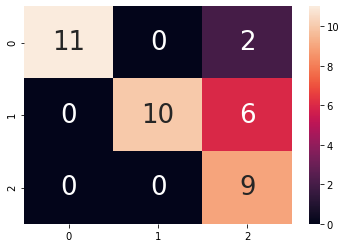

In [111]:
print("    Train score of trained model:", "{0:.3f}".format(100*mSVC.score(X_train, y_train)))
sns.heatmap(confusion_matrix(y_train, mSVC.predict(X_train)), annot=True, annot_kws={"size": 26})
plt.show()

print("    Test score of trained model: ", "{0:.3f}".format(100*mSVC.score(X_test, y_test)))
sns.heatmap(confusion_matrix(y_test, mSVC.predict(X_test)), annot=True, annot_kws={"size": 26})
plt.show()

In [112]:
print(classification_report(y_test, mSVC.predict(X_test)))

              precision    recall  f1-score   support

      setosa       1.00      0.85      0.92        13
  versicolor       1.00      0.62      0.77        16
   virginica       0.53      1.00      0.69         9

    accuracy                           0.79        38
   macro avg       0.84      0.82      0.79        38
weighted avg       0.89      0.79      0.80        38



In [113]:
param = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [10, 1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf','linear', 'poly','sigmoid'],
              'shrinking': [True, False],
              'degree': [1,2,3],
              'probability': [True, False],
              'verbose': [True, False],}

In [114]:
mSVC1 = GridSearchCV(mSVC, param, cv=5, verbose = 1, n_jobs = -1).fit(X_train, y_train)

Fitting 5 folds for each of 2880 candidates, totalling 14400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 956 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 5756 tasks      | elapsed:   18.4s
[Parallel(n_jobs=-1)]: Done 13756 tasks      | elapsed:   47.7s


[LibSVM]

[Parallel(n_jobs=-1)]: Done 14400 out of 14400 | elapsed:   49.6s finished


In [115]:
print(f'GridSearchView Best Estimator: {mSVC1.best_estimator_}')

GridSearchView Best Estimator: SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=1, gamma=10, kernel='poly',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=True)


    Train score of trained model: 100.000


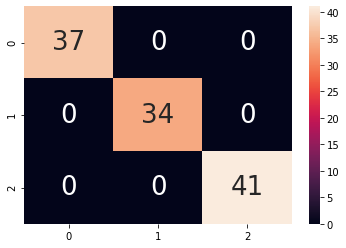

    Test score of trained model:  97.368


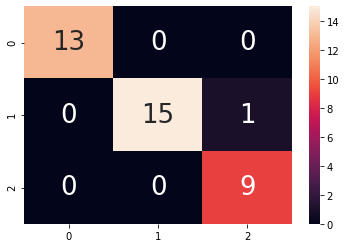

In [116]:
print("    Train score of trained model:", "{0:.3f}".format(100*mSVC1.score(X_train, y_train)))
sns.heatmap(confusion_matrix(y_train, mSVC1.predict(X_train)), annot=True, annot_kws={"size": 26})
plt.show()

print("    Test score of trained model: ", "{0:.3f}".format(100*mSVC1.score(X_test, y_test)))
sns.heatmap(confusion_matrix(y_test, mSVC1.predict(X_test)), annot=True, annot_kws={"size": 26})
plt.show()

In [117]:
print(classification_report(y_test, mSVC1.predict(X_test)))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.94      0.97        16
   virginica       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



In [118]:
print(f'GridSearchView Best Score: {mSVC1.best_score_*100}')

GridSearchView Best Score: 96.40316205533598


 # 09 Keras

In [119]:
from tensorflow.keras.utils import to_categorical

In [120]:
X = data.iloc[:,0:4].values
y = data.iloc[:,4].values

In [121]:
KST = Scl.fit_transform(X)

In [122]:
from sklearn.preprocessing import LabelEncoder

In [123]:
y1 = LabelEncoder().fit_transform(y) # transformo las categorías a Nros (0,1,2)
Y = pd.get_dummies(y1).values # Paso cada categoría a columna de 1 ó 0

In [124]:
X_train,X_test, y_train,y_test = train_test_split(KST,Y,test_size=0.25, random_state=0) 

In [125]:
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam

In [126]:
model = Sequential()
model.add(Dense(10,input_shape=(4,),activation='tanh'))
model.add(Dense(8,activation='tanh'))
model.add(Dense(6,activation='tanh'))
model.add(Dense(3,activation='softmax'))

In [127]:
model.compile(Adam(lr=0.04),'categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                50        
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 88        
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 54        
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 21        
Total params: 213
Trainable params: 213
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [135]:
model.fit(X_train,y_train,epochs=100, verbose=1)

Epoch 1/100
4/4 [==============================] - 0s 2ms/step - loss: 1.6804e-04 - accuracy: 1.0000
Epoch 2/100
4/4 [==============================] - 0s 3ms/step - loss: 1.6630e-04 - accuracy: 1.0000
Epoch 3/100
4/4 [==============================] - 0s 3ms/step - loss: 1.6502e-04 - accuracy: 1.0000
Epoch 4/100
4/4 [==============================] - 0s 3ms/step - loss: 1.6353e-04 - accuracy: 1.0000
Epoch 5/100
4/4 [==============================] - 0s 3ms/step - loss: 1.6181e-04 - accuracy: 1.0000
Epoch 6/100
4/4 [==============================] - 0s 3ms/step - loss: 1.6061e-04 - accuracy: 1.0000
Epoch 7/100
4/4 [==============================] - 0s 3ms/step - loss: 1.5912e-04 - accuracy: 1.0000
Epoch 8/100
4/4 [==============================] - 0s 2ms/step - loss: 1.5785e-04 - accuracy: 1.0000
Epoch 9/100
4/4 [==============================] - 0s 3ms/step - loss: 1.5628e-04 - accuracy: 1.0000
Epoch 10/100
4/4 [==============================] - 0s 4ms/step - loss: 1.5548e-04 - accura

In [136]:
y_pred = model.predict(X_test)

In [137]:
y_test_class = np.argmax(y_test,axis=1) # paso de tres columnas a una columna para poder comparar
y_pred_class = np.argmax(y_pred,axis=1) # y_pred me da una matriz de probabilidades, con argmax hago 1 el mayor

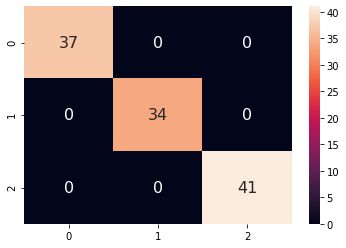

In [138]:
sns.heatmap(confusion_matrix(np.argmax(y_train,axis=1),  np.argmax(model.predict(X_train),axis=1)), annot=True, annot_kws={"size": 16})
plt.show()

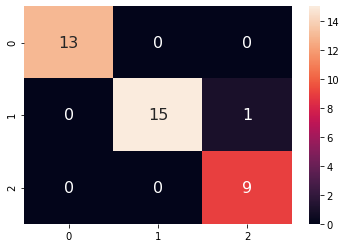

In [139]:
sns.heatmap(confusion_matrix(y_test_class, y_pred_class), annot=True, annot_kws={"size": 16})
plt.show()

In [140]:
print(classification_report(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        16
           2       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



 # Extra: PCA

In [134]:
from sklearn.decomposition import PCA

In [143]:
DataST = Scl.fit_transform(Data)
pca = PCA(n_components=4)
X_new = pca.fit_transform(DataST)
explained_variance=pca.explained_variance_ratio_
explained_variance

array([0.72962445, 0.22850762, 0.03668922, 0.00517871])